# Plot ISOMIP tests

Use Hallberg non-Boussinesq dev executable https://github.com/Hallberg-NOAA/MOM6/tree/nonBoussinesq_dev

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram


In [2]:
base_folder = '/home/156/cy8964/mom6-control/MOM6_pge_tests/Confs/ISOMIP/'
list_folders = ['zstar-bouss','zstar-nonbouss',
                'sigma_shelf_zstar-bouss','sigma_shelf_zstar-nonbouss']

In [3]:
## define some useful functions

def open_files(i):
    base = base_folder + list_folders[i]
    prog = xr.open_dataset(base + '/archive/output000/prog__0001_002.nc')
    ocean_static = xr.open_dataset(base + "/archive/output000/ocean_geometry.nc")
    return prog, ocean_static

def find_speed(prog):
    # interpolate speeds to the same grid
    uo_interp = grid.interp(prog.u,'x',boundary='extend')
    vo_interp = grid.interp(prog.v,'y',boundary='extend')
    horiz_speed = np.sqrt(uo_interp**2+vo_interp**2)
    return horiz_speed

In [4]:
no_configs = len(list_folders)

First run out of the box (layer config with MOM_override:
```
#override TS_CONFIG = "ISOMIP"

! Use zstar
#override USE_REGRIDDING = True
#override REGRIDDING_COORDINATE_MODE = "ZSTAR" ! default = "LAYER"
                                ! Coordinate mode for vertical regridding. Choose among the following
                                ! possibilities:  LAYER - Isopycnal or stacked shallow water layers
                                !  ZSTAR, Z* - stretched geopotential z*
                                !  SIGMA_SHELF_ZSTAR - stretched geopotential z* ignoring shelf
                                !  SIGMA - terrain following coordinates
                                !  RHO   - continuous isopycnal
                                !  HYCOM1 - HyCOM-like hybrid coordinate
                                !  HYBGEN - Hybrid coordinate from the Hycom hybgen code
                                !  SLIGHT - stretched coordinates above continuous isopycnal
                                !  ADAPTIVE - optimize for smooth neutral density surfaces

#override BOUSSINESQ = False
```


zstar-bouss
zstar-nonbouss
sigma_shelf_zstar-bouss
sigma_shelf_zstar-nonbouss


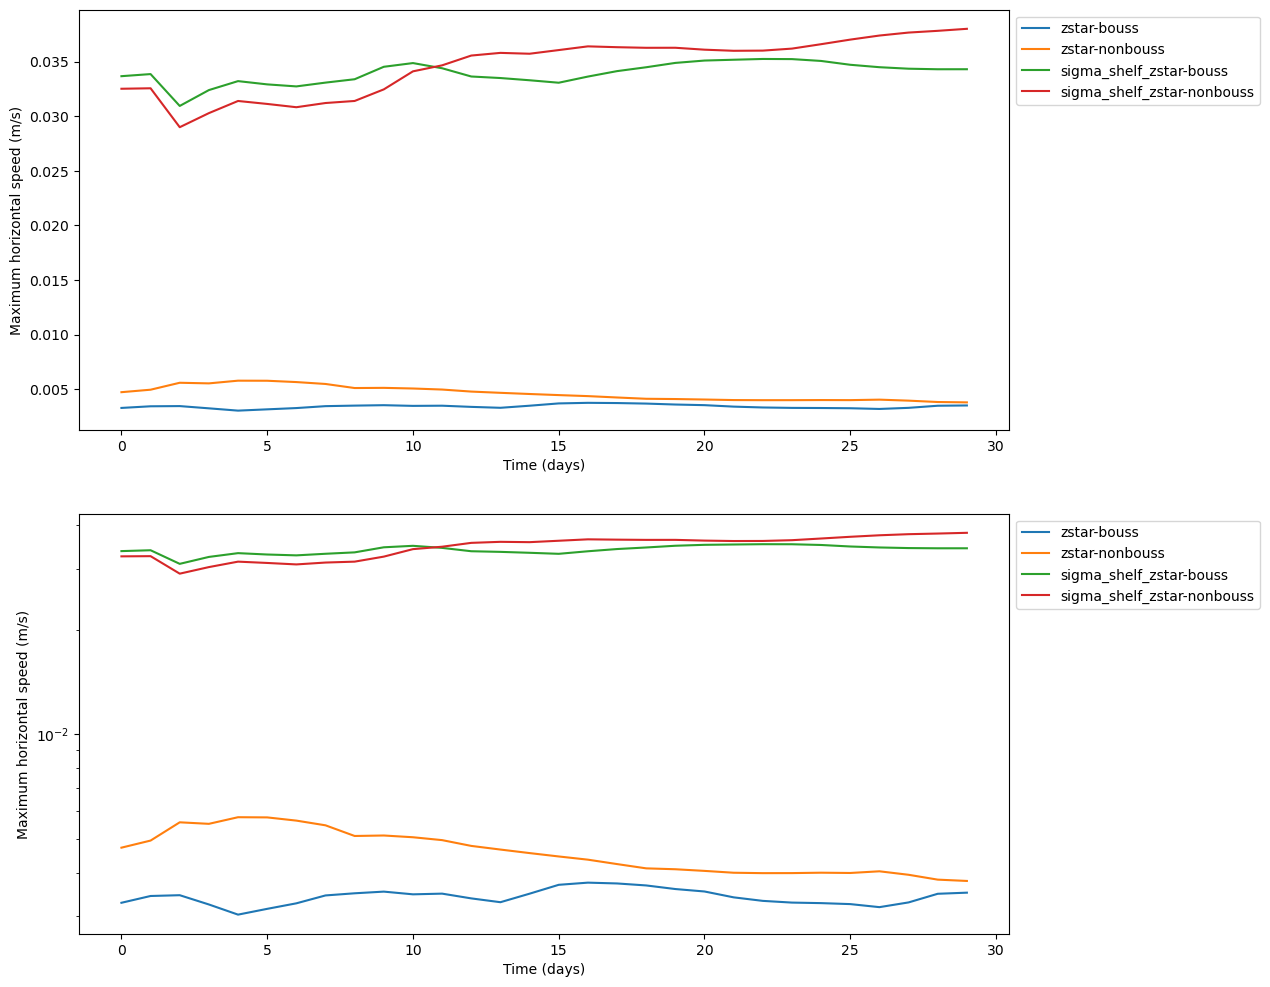

In [26]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,12))
linestyle = '-'
for j in np.arange(no_configs):
    if j >=10: 
        linestyle = '--'
    prog, ocean_static = open_files(j)
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    label = list_folders[j]
    print(label)
    
    horiz_speed = find_speed(prog)
    Time = np.arange(30)
    axes[0].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)
    axes[1].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)


axes[0].set_ylabel('Maximum horizontal speed (m/s)')
axes[0].set_xlabel('Time (days)')
axes[0].legend(bbox_to_anchor = (1,1),loc = 'upper left')

axes[1].set_yscale('log')
axes[1].set_ylabel('Maximum horizontal speed (m/s)')
axes[1].set_xlabel('Time (days)')
axes[1].legend(bbox_to_anchor = (1,1),loc = 'upper left')
plt.show()

Not much improvement....

### Viscosity?

Trying to improve by adding some viscosity:

```
#override DRAG_BG_VEL = 0.05 ! Default is 0.00
#override KH = 6.0 ! ISOMIP Asay-Davis protocol 

#override KV = 1.0E-3 ! ISOMIP Asay-Davis protocol

```

zstar-bouss
zstar-nonbouss
sigma_shelf_zstar-bouss
sigma_shelf_zstar-nonbouss


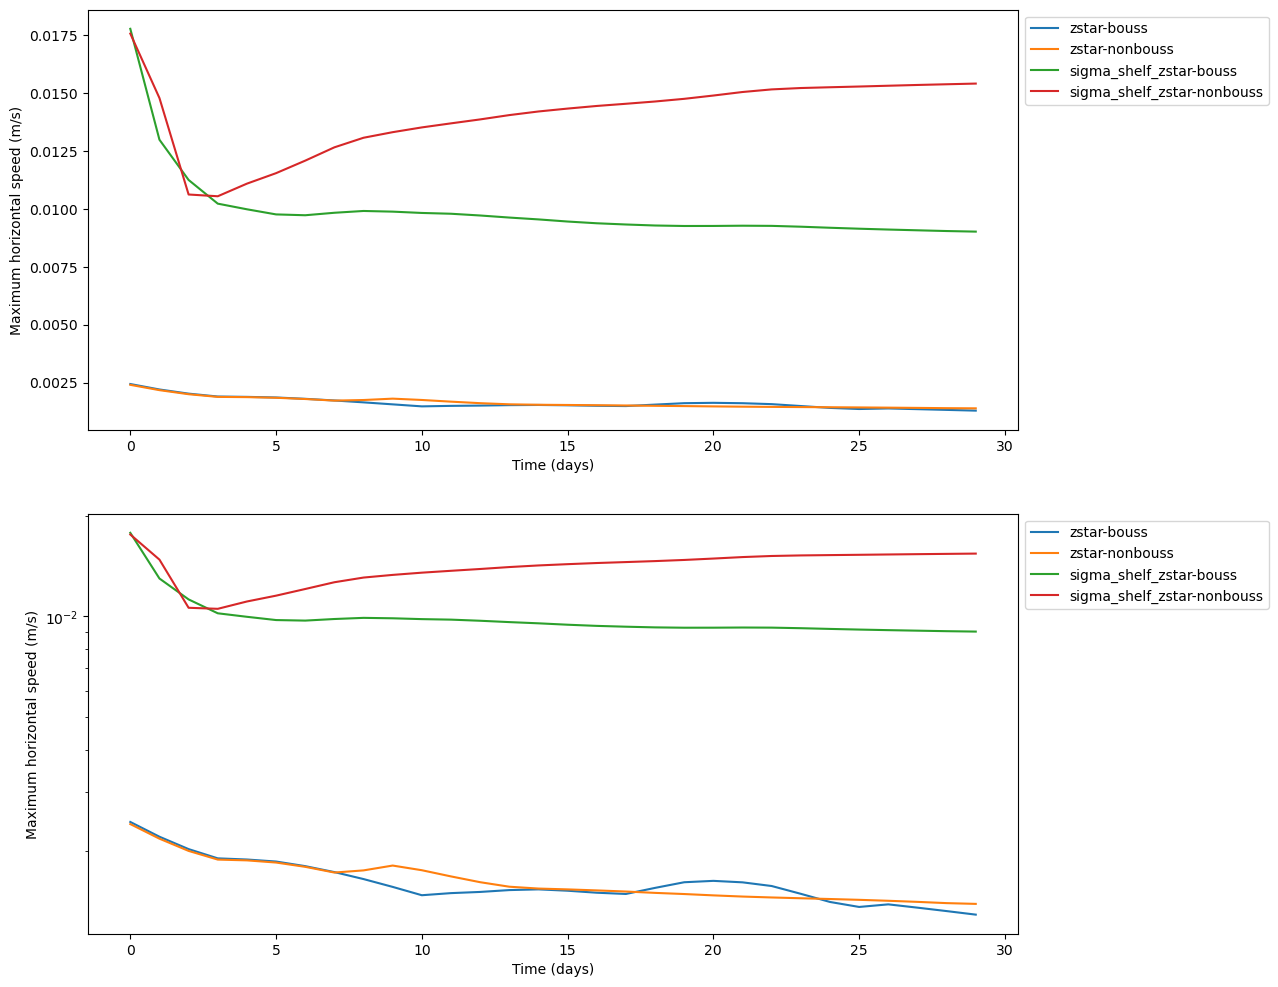

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,12))
linestyle = '-'
for j in np.arange(no_configs):
    if j >=10: 
        linestyle = '--'
    prog, ocean_static = open_files(j)
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    label = list_folders[j]
    print(label)
    
    horiz_speed = find_speed(prog)
    Time = np.arange(30)
    axes[0].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)
    axes[1].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)


axes[0].set_ylabel('Maximum horizontal speed (m/s)')
axes[0].set_xlabel('Time (days)')
axes[0].legend(bbox_to_anchor = (1,1),loc = 'upper left')

axes[1].set_yscale('log')
axes[1].set_ylabel('Maximum horizontal speed (m/s)')
axes[1].set_xlabel('Time (days)')
axes[1].legend(bbox_to_anchor = (1,1),loc = 'upper left')
plt.show()

# Now add hackmode plot

Fixed initialization

Note CURRENTLY NON-BOUSS AND HACKMODE CAUSE MODEL TO CRASH:

```
WARNING from PE    29: btstep: negative eta in a non-Boussinesq barotropic solver.
FATAL from PE     3: btstep: number of barotropic step (nstep+nfilter) is 0
```

zstar-bouss
zstar-nonbouss
sigma_shelf_zstar-bouss
sigma_shelf_zstar-nonbouss
zstar-bouss-hackmode
sigma_shelf_zstar-bouss-hackmode


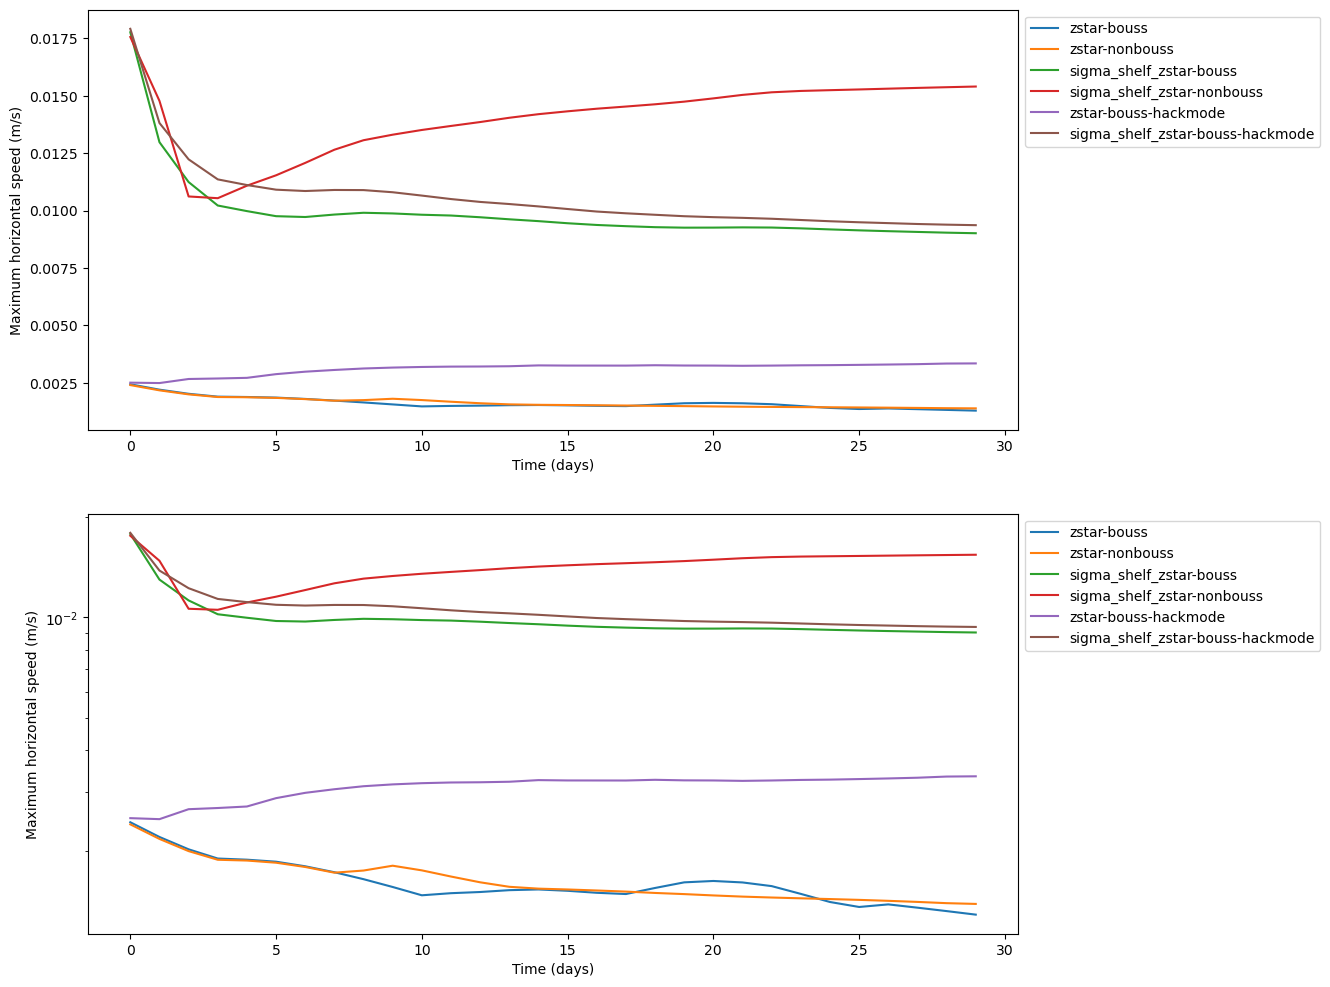

In [6]:
base_folder = '/home/156/cy8964/mom6-control/MOM6_pge_tests/Confs/ISOMIP/'
list_folders = ['zstar-bouss','zstar-nonbouss',
                'sigma_shelf_zstar-bouss','sigma_shelf_zstar-nonbouss',
                'zstar-bouss-hackmode',#'zstar-nonbouss-hackmode',
                'sigma_shelf_zstar-bouss-hackmode',]#'sigma_shelf_zstar-nonbouss-hackmode']

no_configs = len(list_folders)

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,12))
linestyle = '-'
for j in np.arange(no_configs):
    if j >=10: 
        linestyle = '--'
    prog, ocean_static = open_files(j)
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    label = list_folders[j]
    print(label)
    
    horiz_speed = find_speed(prog)
    Time = np.arange(30)
    axes[0].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)
    axes[1].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)


axes[0].set_ylabel('Maximum horizontal speed (m/s)')
axes[0].set_xlabel('Time (days)')
axes[0].legend(bbox_to_anchor = (1,1),loc = 'upper left')

axes[1].set_yscale('log')
axes[1].set_ylabel('Maximum horizontal speed (m/s)')
axes[1].set_xlabel('Time (days)')
axes[1].legend(bbox_to_anchor = (1,1),loc = 'upper left')
plt.show()

Show initialization change with hackmode

In [5]:
def open_IC(i):
    base = base_folder + list_folders[i]
    IC = xr.open_dataset(base + '/archive/output000/ISOMIP_IC.nc')
    return IC
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog, ocean_static = open_files(i)
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = list_folders[i]
    label= file_name
    depth = grid.interp(prog.e,'x')
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if varname == "uo": dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    

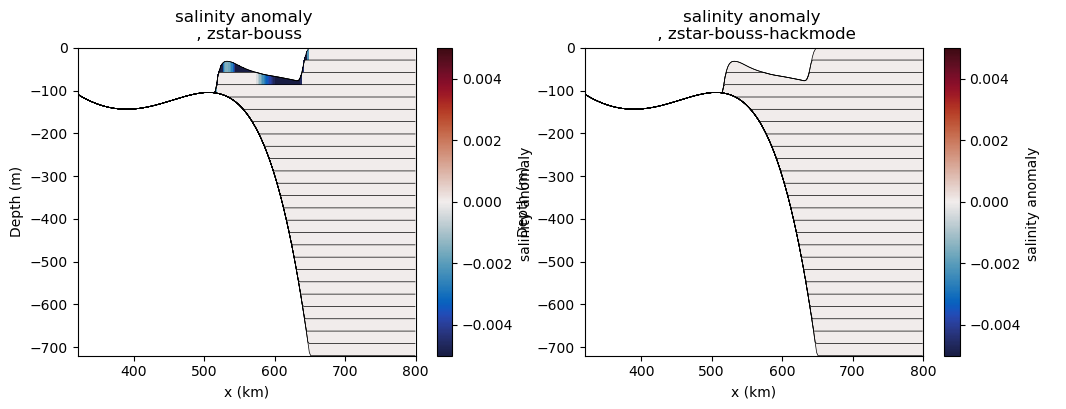

In [13]:
fix, axes = plt.subplots(ncols = 2, figsize = (12,4))

prog, ocean_static = open_files(0)
IC = open_IC(0)
x = -1
time = -1
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8
plot(axes[0],x,time,0,IC.Salt-ideal_salt,"salinity anomaly \n",-5e-3,5e-3,cm.cm.balance,ymax)

prog, ocean_static = open_files(4)
IC = open_IC(4)
x = -1
time = -1
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8
plot(axes[1],x,time,4,IC.Salt-ideal_salt,"salinity anomaly \n",-5e-3,5e-3,cm.cm.balance,ymax)


# Plot velocities at first timestep

In [10]:
base_folder = '/home/156/cy8964/mom6-control/MOM6_pge_tests/Confs/ISOMIP/'
list_folders = ['zstar-bouss-hackmode-short',
                'sigma_shelf_zstar-bouss-hackmode-short']

In [11]:
def open_files(i):
    base = base_folder + list_folders[i]
    prog = xr.open_dataset(base + '/archive/output000/prog__0001_001.nc')
    ocean_static = xr.open_dataset(base + "/archive/output000/ocean_geometry.nc")
    return prog, ocean_static


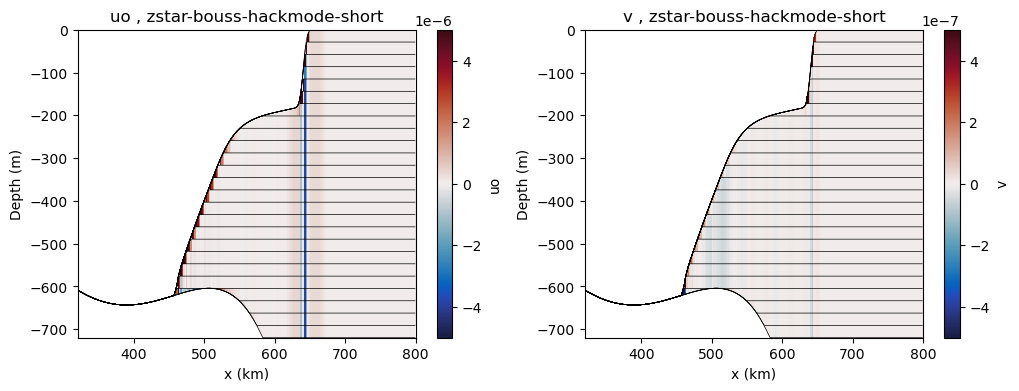

In [18]:
fix, axes = plt.subplots(ncols = 2, figsize = (12,4))

prog, ocean_static = open_files(0)
x = 20
time = 0
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-5e-6,5e-6,cm.cm.balance,ymax)

plot(axes[1],x,time,0,prog.v,"v",-5e-7,5e-7,cm.cm.balance,ymax)


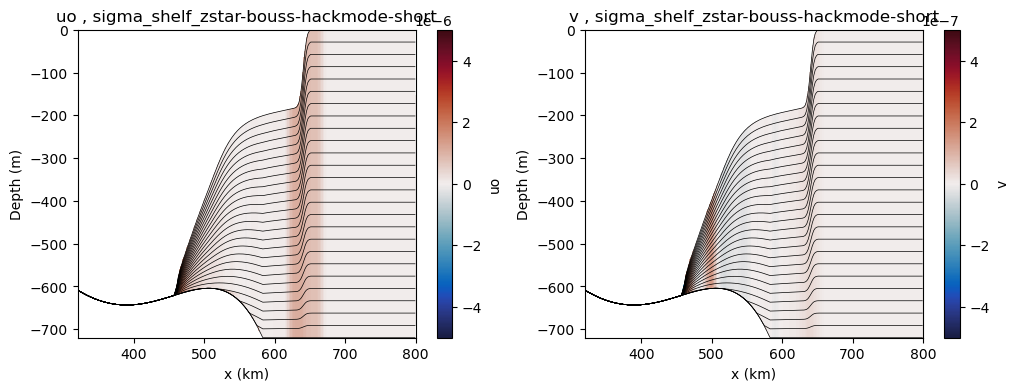

In [20]:
fix, axes = plt.subplots(ncols = 2, figsize = (12,4))

prog, ocean_static = open_files(1)
x = 20
time = 0
ymax = 720
plot(axes[0],x,time,1,prog.u,"uo",-5e-6,5e-6,cm.cm.balance,ymax)

plot(axes[1],x,time,1,prog.v,"v",-5e-7,5e-7,cm.cm.balance,ymax)


In [21]:
prog.u.isel(Time = 0).Time

<xarray.DataArray 'Time' ()>
array(cftime.DatetimeJulian(1, 1, 1, 0, 5, 0, 0, has_year_zero=False),
      dtype=object)
Coordinates:
    Time     object 0001-01-01 00:05:00
Attributes:
    long_name:       Time
    cartesian_axis:  T
    calendar_type:   JULIAN